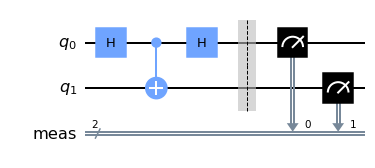

In [2]:
from qiskit import QuantumCircuit

bomb_tester = QuantumCircuit(2)
bomb_tester.h(0)
bomb_tester.cx(0, 1)
bomb_tester.h(0)
bomb_tester.measure_all()
bomb_tester.draw(output='mpl')

In [ ]:
# Running the basic bomb tester circuit

from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()

job = simulator.run(bomb_tester, shots=1000)
result = job.result()
counts = result.get_counts(bomb_tester)

from qiskit.visualization import plot_histogram
plot_histogram(counts)


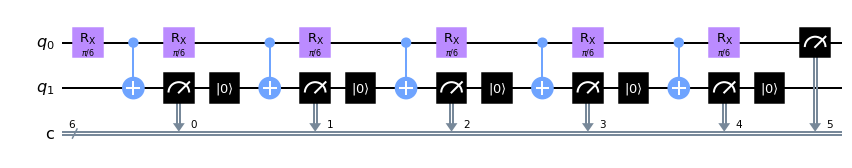

In [4]:
# Coding the Zeno bomb tester 

from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate

cycles = 6 # Choose the number of times we want to pass our photon through the mystery box. The more, the better. 
theta = np.pi/cycles # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit 
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Create a chain of our variable beamsplitters and C-NOT bombs 
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# Add a final beamsplitter
zeno_tester.append(RXGate(theta), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.    
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')

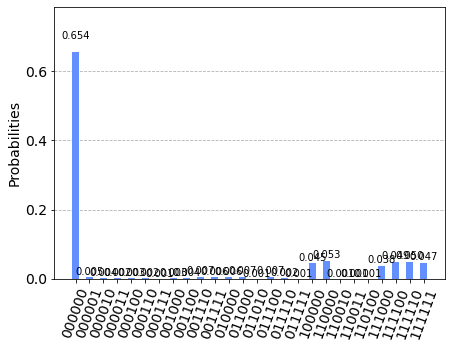

In [5]:
# Running the Zeno bomb tester 

zeno_job = simulator.run(zeno_tester, shots=1000)
zeno_result = zeno_job.result()
zeno_counts = zeno_result.get_counts(zeno_tester)

plot_histogram(zeno_counts)

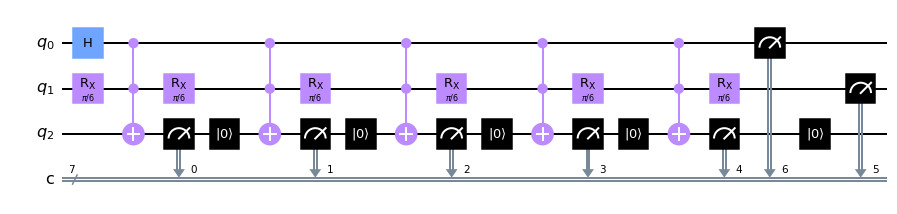

In [6]:
# Setting up the circuit for quantum minesweeper 

from qiskit.circuit.library import CCXGate

def q_sweeper(cycles) -> QuantumCircuit:
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(cycles+1, 'c')
    qc = QuantumCircuit(qr, cr)
    qc.h(qr[0])
    for cycle in range(cycles-1):
        qc.append(RXGate(theta), [qr[1]])
        qc.ccx(qr[0], qr[1], qr[2]) 
        qc.measure(qr[2],cr[cycle])
        if cycle < cycles-1:
            qc.reset(qr[2])
        
    qc.append(RXGate(theta), [qr[1]])
    qc.measure(qr[1],cr[cycles-1])
    qc.measure(qr[0],cr[cycles])
    return qc

successes = 0 # We will use this variable to track the number of successful predictions in a row
cycles = 6
theta = np.pi/cycles

zeno_circuit = q_sweeper(cycles)
zeno_circuit.draw(output='mpl')

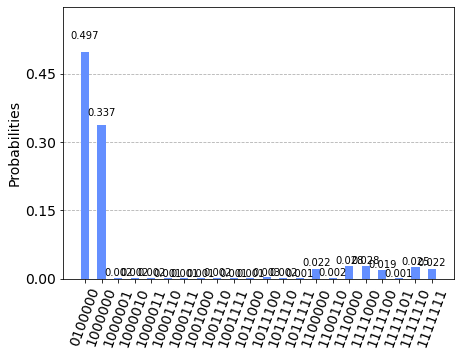

In [7]:
qsweeper_job = simulator.run(zeno_circuit, shots=1000)
qsweeper_result = qsweeper_job.result()
qsweeper_counts = qsweeper_result.get_counts(zeno_circuit)

plot_histogram(qsweeper_counts)

In [ ]:
# Game of quantum minesweeper 
qsweeper_job = simulator.run(zeno_circuit, shots=1)
qsweeper_result = qsweeper_job.result()
qsweeper_counts = qsweeper_result.get_counts(zeno_circuit)

result = sorted(qsweeper_counts.keys())[0]

for i in range(2,cycles): # Check that none of the 3rd to last bits have flipped to a 1 
    if int(result[i]) == 1:
        print("BOOM! The bomb has exploded. You lose... :(")
        print("Your score was:") 
        print(successes)
        successes = 0
        explode = 1
        break
    else:
        explode = 0
    
if explode == 0:
    print("The qubit predicts...")
    if int(result[1]) == 0:
        print("Bomb present")
        Prediction = input("What do you think? Type 0 for no bomb, 1 for bomb.")
    else:
        print("No bomb")
        Prediction = input("What do you think? Type 0 for no bomb, 1 for bomb.")
        
    if Prediction == "0": 
        print("You predicted there is no bomb.")
    elif Prediction == "1":
        print("You predicted there is a bomb")
    else:
        print("Invalid prediction!")

    if Prediction == result[0]:
        print("Congratulations! You predicted correctly, you win Quantum Minesweeper! :D")
        successes += 1
    elif int(Prediction) == (int(result[0]) + 1) % 2:
        print("Uh oh! You predicted wrong. You lose :(")
        print("Your score was:") 
        print(successes)
        successes = 0
    else:
        print("Prediction was invalid so your score is unchanged.")
    
print("Quantum Minesweeper score:")
print(successes)

The qubit predicts...
No bomb
